<a href="https://colab.research.google.com/github/JungseoChoi/CJSbioinformatics/blob/main/bioinformatics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# anaconda 환경 불러오기

In [2]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0
Unpacking objects: 100% (76/76), 318.14 KiB | 3.50 MiB/s, done.
./
./root/
./root/.bashrc.biolab
./root/.condarc
./root/.tmux.conf
./root/.profile
./root/.vimrc
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip3
./root/.bin.priority/pip2
--2023-06-03 02:28:46--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73134376 (70M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  69.75M   230MB/s    in 0.3s    

2023-06-03 02:28:47 (230 MB/

In [3]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

total 7162852
-r-------- 1 root root 1370036258 Apr 27 14:53 CLIP-35L33G.bam
-r-------- 1 root root    3118336 Apr 27 14:53 CLIP-35L33G.bam.bai
-r-------- 1 root root       7113 May 11 11:02 CLIP-let7g.bam
-r-------- 1 root root      14561 May 11 11:03 CLIP-let7g-gene.pileup
-r-------- 1 root root    2685065 May 11 11:02 CLIP-let7g.pileup
-r-------- 1 root root  883334756 Apr 27 14:53 gencode.gtf
-r-------- 1 root root   24065406 Apr 27 15:15 read-counts.txt
-r-------- 1 root root        751 Apr 27 15:15 read-counts.txt.summary
-r-------- 1 root root 1003658801 Apr 27 14:54 RNA-control.bam
-r-------- 1 root root    2276104 Apr 27 14:53 RNA-control.bam.bai
-r-------- 1 root root 1260991122 Apr 27 14:54 RNA-siLin28a.bam
-r-------- 1 root root    2710744 Apr 27 14:54 RNA-siLin28a.bam.bai
-r-------- 1 root root  981684502 Apr 27 14:54 RNA-siLuc.bam
-r-------- 1 root root    2606104 Apr 27 14:54 RNA-siLuc.bam.bai
-r-------- 1 root root  737352902 Apr 27 14:54 RPF-siLin28a.bam
-r-------- 1 r

In [4]:
!conda install -y subread

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - subread


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    

In [5]:
%cd /content/drive/MyDrive/binfo1-project
!cp ../binfo1-datapack1/*.* .

/content/drive/MyDrive/binfo1-project


In [6]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.3

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 7 BAM files                                      ||
||                                                                            ||
||                           CLIP-35L33G.bam                                  ||
||                           CLIP-let7g.bam                                   ||
||                           RNA-control.bam                     

In [7]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0


In [8]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,NaN,NaN


In [9]:
# 최소 10 이상의 read count를 가진 행들만 선택
filtered_data = cnts[(cnts['CLIP-35L33G.bam'] >= 10) &
                     (cnts['RNA-control.bam'] >= 10) &
                     (cnts['RPF-siLin28a.bam'] >= 10) &
                     (cnts['RNA-siLin28a.bam'] >= 10) &
                     (cnts['RPF-siLuc.bam'] >= 10) &
                     (cnts['RNA-siLuc.bam'] >= 10)]
filtered_data.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,0,95,93,100,42,75,1.926316,0.602151
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,1355,3022,2563,1859,3191,2.962362,0.494091
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,0,762,2130,2225,328,609,2.175853,0.562609
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,0,474,1260,1031,603,1128,2.343882,0.437418


In [10]:
cnts['gene_id'] = cnts.index.to_series().str.split('.').str[0]
filtered_data = cnts
filtered_data.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000102693
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000064842
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0,4.0,NaN,ENSMUSG00000051951
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,inf,NaN,ENSMUSG00000102851
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000103377


In [11]:
# 'gene_id' 열만 선택하여 새로운 데이터프레임 생성
subset = filtered_data[['gene_id']] 
subset.to_csv('output_gene_id.txt', sep='\t', index=False)

# Uniprot에서 Ensemble을 기준으로 matching을 시킨다음 tsv파일로 불러왔음.

In [12]:
# 가져온 tsv파일을 이용해 파일 읽기
GO_term = pd.read_csv('GO_term.tsv', sep='\t', index_col=0)
GO_term

,Entry,Gene Ontology (GO),Entry Name,Gene Names
From,,,,
ENSMUSG00000025903,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a
ENSMUSG00000025903,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1
ENSMUSG00000025903,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1
ENSMUSG00000025903,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1
ENSMUSG00000025903,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1
...,...,...,...,...
ENSMUSG00000064345,P03893,mitochondrial inner membrane [GO:0005743]; mit...,NU2M_MOUSE,mt-Nd2 Nd2
ENSMUSG00000064351,P00397,mitochondrial inner membrane [GO:0005743]; mit...,COX1_MOUSE,Mtco1 COI mt-Co1
ENSMUSG00000064363,P03911,mitochondrial inner membrane [GO:0005743]; mit...,NU4M_MOUSE,Mtnd4 mt-Nd4 Nd4


In [13]:
# From column을 gene_id을 추가
GO_term['gene_id'] = GO_term.index.to_series()
GO_term

,Entry,Gene Ontology (GO),Entry Name,Gene Names,gene_id
From,,,,,
ENSMUSG00000025903,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a,ENSMUSG00000025903
ENSMUSG00000025903,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1,ENSMUSG00000025903
ENSMUSG00000025903,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1,ENSMUSG00000025903
ENSMUSG00000025903,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1,ENSMUSG00000025903
ENSMUSG00000025903,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1,ENSMUSG00000025903
...,...,...,...,...,...
ENSMUSG00000064345,P03893,mitochondrial inner membrane [GO:0005743]; mit...,NU2M_MOUSE,mt-Nd2 Nd2,ENSMUSG00000064345
ENSMUSG00000064351,P00397,mitochondrial inner membrane [GO:0005743]; mit...,COX1_MOUSE,Mtco1 COI mt-Co1,ENSMUSG00000064351
ENSMUSG00000064363,P03911,mitochondrial inner membrane [GO:0005743]; mit...,NU4M_MOUSE,Mtnd4 mt-Nd4 Nd4,ENSMUSG00000064363


In [56]:
merged_GO = pd.merge(filtered_data, GO_term, on='gene_id')
merged_GO

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id,Entry,Gene Ontology (GO),Entry Name,Gene Names
0,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a
1,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1
2,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1
3,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1
4,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17910,chrM,3914,4951,+,1038,269,0,1253,3021,3012,2975,2156,0.214685,1.375759,ENSMUSG00000064345,P03893,mitochondrial inner membrane [GO:0005743]; mit...,NU2M_MOUSE,mt-Nd2 Nd2
17911,chrM,5328,6872,+,1545,533,0,16638,50576,39430,21253,17355,0.032035,0.954724,ENSMUSG00000064351,P00397,mitochondrial inner membrane [GO:0005743]; mit...,COX1_MOUSE,Mtco1 COI mt-Co1
17912,chrM,10167,11544,+,1378,373,0,2150,5028,4224,3292,2498,0.173488,1.107123,ENSMUSG00000064363,P03911,mitochondrial inner membrane [GO:0005743]; mit...,NU4M_MOUSE,Mtnd4 mt-Nd4 Nd4
17913,chrM,11742,13565,+,1824,3665,0,5281,15549,17408,5986,5305,0.693997,1.263275,ENSMUSG00000064367,P03921,mitochondrial inner membrane [GO:0005743]; mit...,NU5M_MOUSE,Mtnd5 mt-Nd5 Nd5


In [57]:
#merged_GO에서 원하는 column만 보이게.
subsets_GO = merged_GO[['gene_id', 'clip_enrichment', 'rden_change', 'Gene Ontology (GO)']].set_index('gene_id')
subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface [GO:0009986]; cytoplasm [GO:00057...
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
...,...,...,...
ENSMUSG00000064345,0.214685,1.375759,mitochondrial inner membrane [GO:0005743]; mit...
ENSMUSG00000064351,0.032035,0.954724,mitochondrial inner membrane [GO:0005743]; mit...
ENSMUSG00000064363,0.173488,1.107123,mitochondrial inner membrane [GO:0005743]; mit...


In [61]:
# Gene ontology (GO)에서 [GO:0009986]을 없애기
import re
pattern = re.compile(r'\s*\[GO:\d+\]\s*' )
subsets_GO['Gene Ontology (GO)'] = subsets_GO['Gene Ontology (GO)'].str.replace(pattern, '')
subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface
ENSMUSG00000025903,3.562718,0.760459,cytoplasm
ENSMUSG00000025903,3.562718,0.760459,cytosol
ENSMUSG00000025903,3.562718,0.760459,endoplasmic reticulum
ENSMUSG00000025903,3.562718,0.760459,mitochondrion
...,...,...,...
ENSMUSG00000064368,0.843117,1.263780,mitochondrial respiratory chain complex I ass...
ENSMUSG00000064368,0.843117,1.263780,proton motive force-driven mitochondrial ATP ...
ENSMUSG00000064368,0.843117,1.263780,response to cocaine


In [86]:
# Gene ontology (GO)에서 ';'을 기준으로 새로운 행으로 만들기 ##여기서 너무 많은 행이 생김.단순화 할 수 있는 방법이 없을까?
subsets_GO = subsets_GO.assign(**{'Gene Ontology (GO)': subsets_GO['Gene Ontology (GO)'].str.split(';')}).explode('Gene Ontology (GO)')
subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface
ENSMUSG00000025903,3.562718,0.760459,cytoplasm
ENSMUSG00000025903,3.562718,0.760459,cytosol
ENSMUSG00000025903,3.562718,0.760459,endoplasmic reticulum
ENSMUSG00000025903,3.562718,0.760459,mitochondrion
...,...,...,...
ENSMUSG00000064368,0.843117,1.263780,mitochondrial respiratory chain complex I ass...
ENSMUSG00000064368,0.843117,1.263780,proton motive force-driven mitochondrial ATP ...
ENSMUSG00000064368,0.843117,1.263780,response to cocaine


In [87]:
filtered_subsets_GO = subsets_GO.groupby('Gene Ontology (GO)').filter(lambda x: len(x) >= 10)
filtered_subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface
ENSMUSG00000025903,3.562718,0.760459,cytoplasm
ENSMUSG00000025903,3.562718,0.760459,cytosol
ENSMUSG00000025903,3.562718,0.760459,endoplasmic reticulum
ENSMUSG00000025903,3.562718,0.760459,mitochondrion
...,...,...,...
ENSMUSG00000064368,0.843117,1.263780,mitochondrial respiratory chain complex I ass...
ENSMUSG00000064368,0.843117,1.263780,proton motive force-driven mitochondrial ATP ...
ENSMUSG00000064368,0.843117,1.263780,response to cocaine


In [ ]:
#GO_term에 따라 clip-enrichment값과 rden_change값이 Mann-Whitney U test를 통해 제대로 차이가 있는 것인지 확인.
import scipy.stats as stats

filtered_subsets_GO_stat = filtered_subsets_GO.groupby('Gene Ontology (GO)')

# 그룹별로 통계 진행
for Gene_Ontology, group_df in filtered_subsets_GO_stat:
  # 같은 Gene Ontology (GO) 값을 가지는 행만 선택
  same_GO_clip = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology]['clip_enrichment']
  same_GO_rden = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology]['rden_change']
  
  # 다른 Gene Ontology (GO) 값을 가지는 행 선택
  other_GO_clip = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] != Gene_Ontology]['clip_enrichment']
  other_GO_rden = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] != Gene_Ontology]['rden_change']
  
  # Mann-Whitney U 테스트 수행
  statistic_clip, p_value_clip = stats.mannwhitneyu(same_GO_clip, other_GO_clip)
  statistic_rden, p_value_rden = stats.mannwhitneyu(same_GO_rden, other_GO_rden)
    
  # 결과 출력
  print(f'Group: {Gene_Ontology}')
  print('Clip Enrichment')
  print(f'Mann-Whitney U statistic: {statistic_clip}')
  print(f'p-value_clip: {p_value_clip}')
  print()
  print('Ribosome Density Change')
  print(f'Mann-Whitney U statistic: {statistic_rden}')
  print(f'p-value_rden: {p_value_rden}')
  print()

  # filtered_subsets_GO에 열 추가
  filtered_subsets_GO.loc[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology, 'clip_enrichment_p-value'] = p_value_clip
  filtered_subsets_GO.loc[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology, 'rden_change_p-value'] = p_value_rden

In [126]:
filtered_subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO),clip_enrichment_p-value,rden_change_p-value,clip_enrichment_fdr,rden_change_fdr
gene_id,,,,,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface,3.169212e-06,2.387639e-20,2.053694e-05,1.965181e-19
ENSMUSG00000025903,3.562718,0.760459,cytoplasm,1.413638e-04,7.265178e-07,7.370591e-04,2.729992e-06
ENSMUSG00000025903,3.562718,0.760459,cytosol,1.028072e-10,5.690181e-15,1.135641e-09,3.728391e-14
ENSMUSG00000025903,3.562718,0.760459,endoplasmic reticulum,3.099904e-12,1.004717e-24,7.869189e-11,1.045180e-23
ENSMUSG00000025903,3.562718,0.760459,mitochondrion,4.960232e-03,1.259701e-07,1.753889e-02,5.447470e-07
...,...,...,...,...,...,...,...
ENSMUSG00000064368,0.843117,1.263780,mitochondrial respiratory chain complex I ass...,4.800668e-01,3.281103e-06,6.433649e-01,1.141861e-05
ENSMUSG00000064368,0.843117,1.263780,proton motive force-driven mitochondrial ATP ...,9.881641e-01,1.131912e-05,9.961738e-01,3.847745e-05
ENSMUSG00000064368,0.843117,1.263780,response to cocaine,8.977080e-01,1.300371e-01,9.582268e-01,2.065684e-01


In [127]:
# fdr 구하기
from statsmodels.stats import multitest

# clip_enrichment_p-value,rden_change_p-value 값들의 배열
clip_p_values = filtered_subsets_GO['clip_enrichment_p-value'].values
rden_p_values = filtered_subsets_GO['rden_change_p-value'].values

# clip_enrichment_p-value, rden_change_p-value에 대한 FDR 계산
reject_clip, fdr_corrected_p_values_clip, _, _ = multitest.multipletests(clip_p_values, method='fdr_bh')
reject_rden, fdr_corrected_p_values_rden, _, _ = multitest.multipletests(rden_p_values, method='fdr_bh')

# 조정된 p-value를 filtered_subsets_GO에 추가
filtered_subsets_GO['clip_enrichment_fdr'] = fdr_corrected_p_values_clip
filtered_subsets_GO['rden_change_fdr'] = fdr_corrected_p_values_rden

filtered_subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO),clip_enrichment_p-value,rden_change_p-value,clip_enrichment_fdr,rden_change_fdr
gene_id,,,,,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface,3.169212e-06,2.387639e-20,2.053694e-05,1.965181e-19
ENSMUSG00000025903,3.562718,0.760459,cytoplasm,1.413638e-04,7.265178e-07,7.370591e-04,2.729992e-06
ENSMUSG00000025903,3.562718,0.760459,cytosol,1.028072e-10,5.690181e-15,1.135641e-09,3.728391e-14
ENSMUSG00000025903,3.562718,0.760459,endoplasmic reticulum,3.099904e-12,1.004717e-24,7.869189e-11,1.045180e-23
ENSMUSG00000025903,3.562718,0.760459,mitochondrion,4.960232e-03,1.259701e-07,1.753889e-02,5.447470e-07
...,...,...,...,...,...,...,...
ENSMUSG00000064368,0.843117,1.263780,mitochondrial respiratory chain complex I ass...,4.800668e-01,3.281103e-06,6.433649e-01,1.141861e-05
ENSMUSG00000064368,0.843117,1.263780,proton motive force-driven mitochondrial ATP ...,9.881641e-01,1.131912e-05,9.961738e-01,3.847745e-05
ENSMUSG00000064368,0.843117,1.263780,response to cocaine,8.977080e-01,1.300371e-01,9.582268e-01,2.065684e-01


In [141]:
# Gene Ontology (GO) 값이 같은 행들을 그룹화하고 그룹화한 행의 개수, clip_enrichment와 rden_change의 평균값 계산
GO_heatmap = filtered_subsets_GO.groupby(
    'Gene Ontology (GO)').agg({'clip_enrichment': 'mean', 'rden_change': 'mean', 'clip_enrichment_p-value': 'mean','rden_change_p-value':'mean', 'clip_enrichment_fdr': 'mean','rden_change_fdr':'mean'}).reset_index()

# column이름 새로 넣기
GO_heatmap = GO_heatmap.rename(columns={'clip_enrichment': 'clip_enrichment_mean'})
GO_heatmap = GO_heatmap.rename(columns={'rden_change': 'rden_change_mean'})

GO_heatmap['GO_count'] = filtered_subsets_GO.groupby('Gene Ontology (GO)').size().values

GO_heatmap.set_index('Gene Ontology (GO)')

GO_heatmap

,Gene Ontology (GO),clip_enrichment_mean,rden_change_mean,clip_enrichment_p-value,rden_change_p-value,clip_enrichment_fdr,rden_change_fdr,GO_count
0,'de novo' pyrimidine nucleobase biosynthetic ...,0.880241,0.402783,0.000589,0.016338,0.002700,0.032536,11
1,1-phosphatidylinositol binding,2.218695,0.516430,0.253094,0.856785,0.400433,0.895652,11
2,14-3-3 protein binding,1.558546,0.475321,0.055145,0.067277,0.130102,0.115374,24
3,"2 iron, 2 sulfur cluster binding",1.707135,0.724828,0.266712,0.052627,0.415980,0.092079,10
4,2-oxoglutarate-dependent dioxygenase activity,1.764799,0.464359,0.358346,0.137867,0.520864,0.217476,13
...,...,...,...,...,...,...,...,...
2390,signal transduction,2.066612,0.474866,0.803539,0.028960,0.903501,0.054058,35
2391,spliceosomal complex,3.274485,0.488004,0.150867,0.110359,0.280683,0.178015,13
2392,ubiquitin protein ligase activity,2.933584,0.514321,0.206060,0.331752,0.344685,0.433480,26
2393,ubiquitin-protein transferase activity,1.629920,0.642201,0.331558,0.897258,0.489604,0.925486,12


In [ ]:
# GO_count의 수가 너무 많은데, 이게 정상적인 숫자인지..? 맞음
GO_heatmap_sorted = GO_heatmap.sort_values(by='GO_count', ascending=False).set_index('Gene Ontology (GO)')
GO_heatmap_sorted

In [167]:
#GO_heatmap의 clip_enrichment_fdr이 0.05미만인 것들만 추리기
GO_heatmap_filtered = GO_heatmap[GO_heatmap['clip_enrichment_fdr'] <= 0.05]
GO_heatmap_filtered

,Gene Ontology (GO),clip_enrichment_mean,rden_change_mean,clip_enrichment_p-value,rden_change_p-value,clip_enrichment_fdr,rden_change_fdr,GO_count
0,'de novo' pyrimidine nucleobase biosynthetic ...,0.880241,0.402783,5.887975e-04,1.633812e-02,2.699887e-03,3.253642e-02,11
8,"4 iron, 4 sulfur cluster binding",1.471907,0.438418,1.321935e-02,5.388884e-03,4.113113e-02,1.210912e-02,25
15,ATP hydrolysis activity,2.987592,0.546554,1.585070e-03,3.315372e-03,6.466274e-03,7.943074e-03,272
18,ATP-dependent FeS chaperone activity,0.443154,0.488725,9.568659e-08,5.015385e-01,7.630066e-07,6.086583e-01,12
20,ATP-dependent chromatin remodeler activity,3.237061,0.476057,6.102754e-04,2.892704e-02,2.739331e-03,5.402942e-02,39
...,...,...,...,...,...,...,...,...
2384,protein-arginine N-methyltransferase activity,0.555100,0.353944,8.031245e-07,1.919693e-04,5.515959e-06,5.513350e-04,12
2387,ribonucleoprotein complex,1.230464,0.565512,2.194400e-03,5.468555e-01,8.597576e-03,6.542284e-01,18
2388,sarcoplasmic reticulum membrane,8.957487,0.984454,3.017842e-09,1.159988e-08,2.456192e-08,6.237918e-08,18
2389,signal peptidase complex,5.513062,0.855017,1.533375e-06,2.056968e-05,1.048719e-05,6.797431e-05,12


In [176]:
# GO_count의 수가 너무 많은데, 이게 정상적인 숫자인지..? 맞음
GO_heatmap_sorted = GO_heatmap_filtered.sort_values(by='clip_enrichment_fdr', ascending=False).set_index('Gene Ontology (GO)')
GO_heatmap_sorted

,clip_enrichment_mean,rden_change_mean,clip_enrichment_p-value,rden_change_p-value,clip_enrichment_fdr,rden_change_fdr,GO_count
Gene Ontology (GO),,,,,,,
endoplasmic reticulum organization,3.610789,0.788200,1.648247e-02,2.848740e-05,4.973915e-02,9.253618e-05,25
localization,3.055518,0.516809,1.647250e-02,4.503492e-01,4.973915e-02,5.566661e-01,21
apoptotic process,1.229150,0.595318,1.637217e-02,2.412343e-01,4.947114e-02,3.424193e-01,17
transmembrane receptor protein tyrosine kinase signaling pathway,4.412114,0.770027,1.615629e-02,1.140981e-04,4.884253e-02,3.525430e-04,24
cell migration,3.089632,0.646286,1.613743e-02,1.274648e-02,4.881897e-02,2.612387e-02,114
...,...,...,...,...,...,...,...
endoplasmic reticulum membrane,4.223334,0.914547,3.610366e-23,3.426518e-67,1.250857e-21,2.216226e-65,238
endoplasmic reticulum,4.545699,0.847862,2.688613e-23,6.662326e-40,1.010176e-21,2.135636e-38,191
membrane,3.442630,0.746717,2.415343e-24,1.160433e-62,9.734834e-23,4.891141e-61,875


각 GO term에서 해당하는 CLIP_Enrichment, rden_change에서의 값이 GO term에 해당하지 않는 값들과 비교했을 때 유의미한 차이가 있는지 확인하는게 Mann-Whitney U test임. 그래서 이걸 먼저 해서, 각 p-value를 구한 다음, 거기서 fdr을 구해서 그 값들에 대해서 heatmap dot plot을 그리면 됨.
(교수님이 phythonpy에 굉장히 편리한 Mann-Whitney U test가 있다고 함)

추가적으로 dot이 많이 나오는데, 여기서 10개 이상으로 제한을 두거나, 25 이상을 제한을 두거나 해서 그림을 그리면 됨.
그 후 fdr값을 기준으로 진하기를 표시하고 상위13개 GO_count 값만 표현하면괜찮을 것 같음..

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# log2 변환
x = np.log2(GO_heatmap['clip_enrichment_mean'])
y = np.log2(GO_heatmap['rden_change_mean']+1)
sizes = GO_heatmap['GO_count']

# 그래프 그리기
plt.figure(figsize=(15,8))
plt.scatter(x, y, s=sizes, c=sizes, cmap='YlOrRd')
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

plt.colorbar(label='GO_count')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-177-030f52e45bbc>", line 26, in <cell line: 26>
    cbar.set_ticklabels(labels)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/colorbar.py", line 950, in set_ticklabels
    self._long_axis().set_ticklabels(ticklabels, minor=minor, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/_api/deprecation.py", line 297, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/axis.py", line 1969, in set_ticklabels
    raise ValueError(
ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (11).

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist

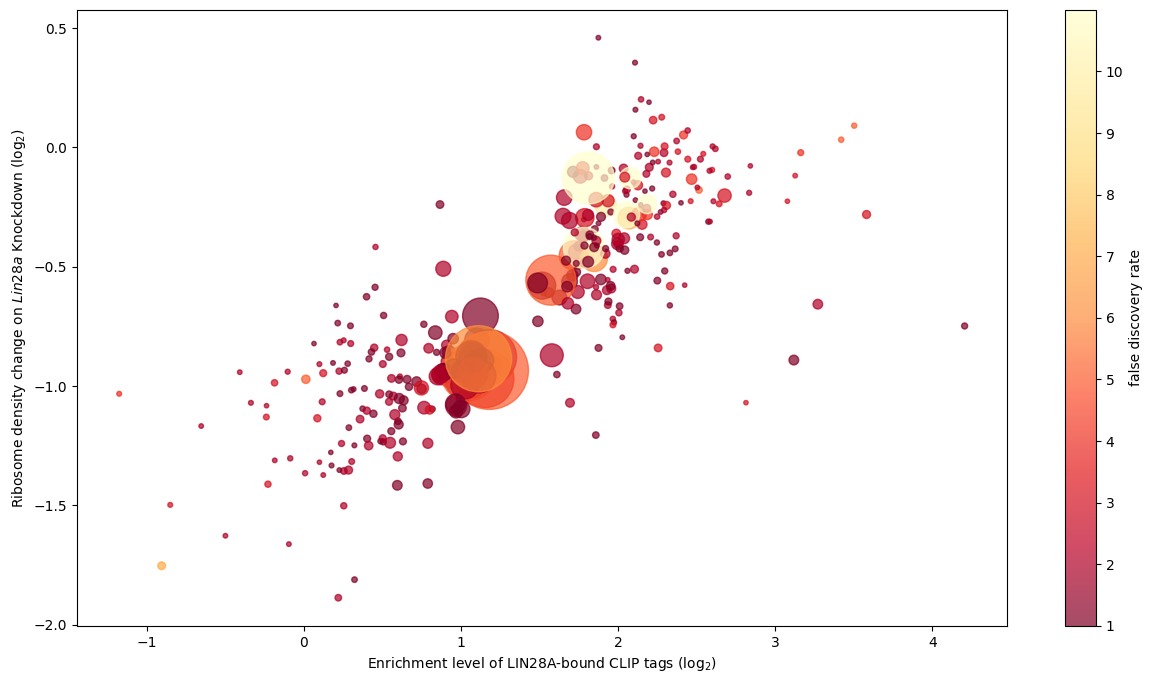

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# log2 변환
x = np.log2(GO_heatmap_filtered['clip_enrichment_mean'])
y = np.log2(GO_heatmap_filtered['rden_change_mean'])
size = GO_heatmap_filtered['GO_count']
color = GO_heatmap_filtered['clip_enrichment_fdr']

# 그래프 그리기
plt.figure(figsize=(15, 8))
scatter_plot = plt.scatter(x, y, s=size, c=color, cmap='YlOrRd_r', alpha=.7)
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

# Colorbar 설정
cbar = plt.colorbar(scatter_plot, label='false discovery rate')
cbar.set_ticklabels(['$10^{-20}$', '$10^{-15}$', '$10^{-10}$', '$10^{-5}$', '$10^{0}$'])  # 눈금에 대응하는 레이블 설정

plt.show()


NameError: ignored

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-175-01eed44b9d27>", line 26, in <cell line: 26>
    cbar.set_ticklabels([f'{percentiles[i]}-{percentiles[i+1]}%' for i in range(len(percentiles) - 1)])
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/colorbar.py", line 950, in set_ticklabels
    self._long_axis().set_ticklabels(ticklabels, minor=minor, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/_api/deprecation.py", line 297, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/axis.py", line 1969, in set_ticklabels
    raise ValueError(
ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (10).

During handling of the above exception, another exception occurred:

T

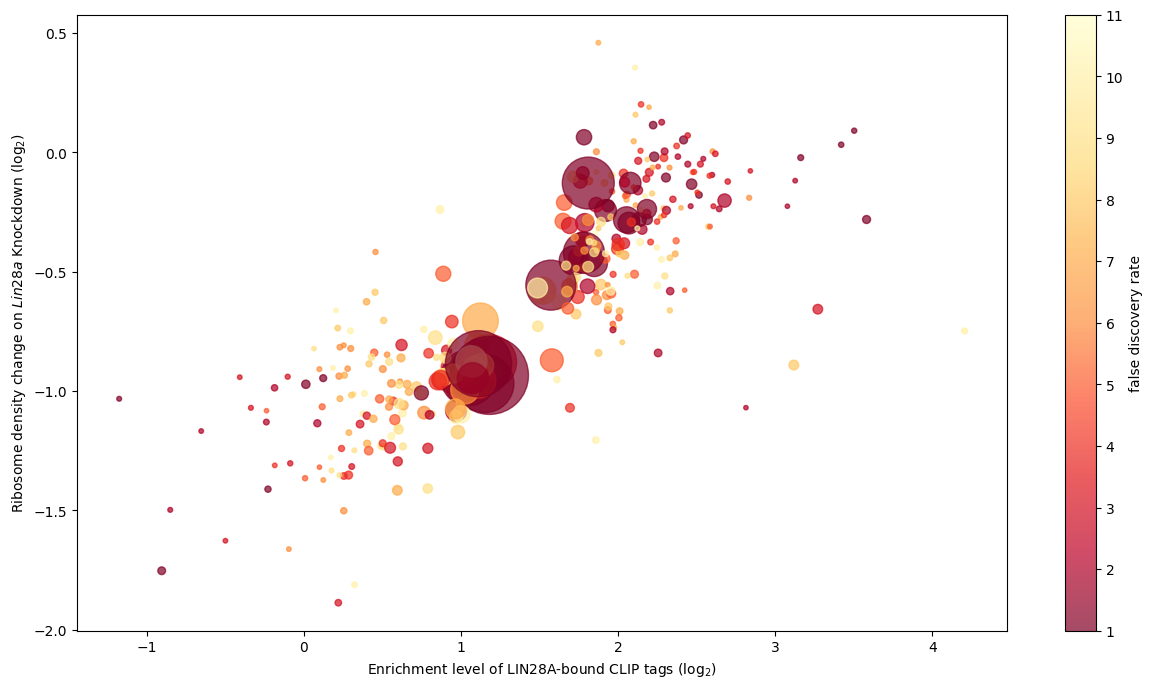

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-177-030f52e45bbc>", line 26, in <cell line: 26>
    cbar.set_ticklabels(labels)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/colorbar.py", line 950, in set_ticklabels
    self._long_axis().set_ticklabels(ticklabels, minor=minor, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/_api/deprecation.py", line 297, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/axis.py", line 1969, in set_ticklabels
    raise ValueError(
ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (11).

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist

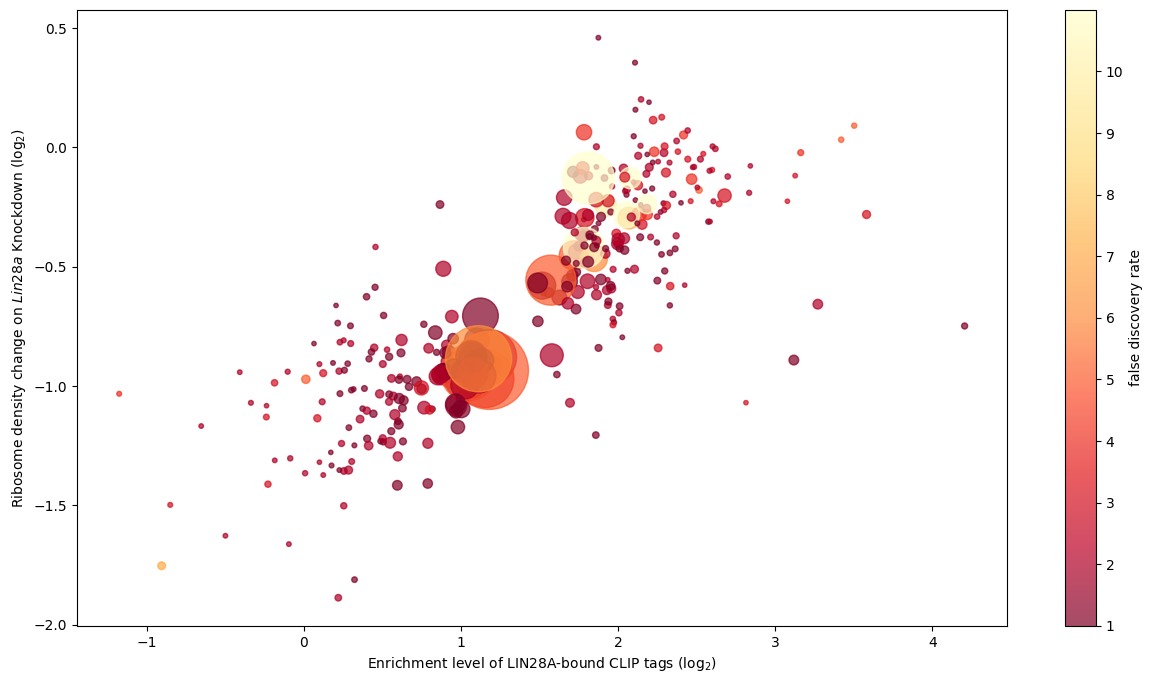